Sample size = 30,000 points
Monte Carlo estimation for probability = 0.777200
Actual probability = 0.776870
Percent relative error = 0.042499%


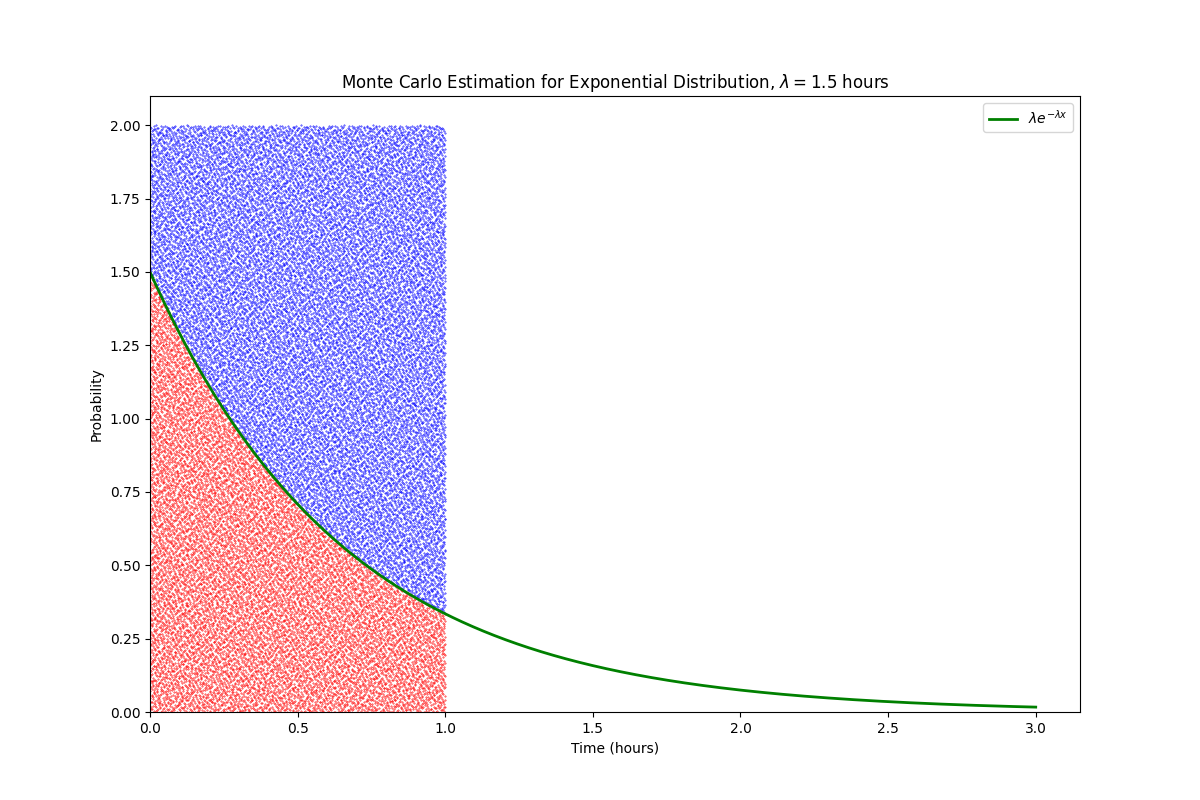

In [24]:
"""mc_exp_dist.ipynb"""
# Cell 1: Estimate the probability an event will occur within one hour of an exponential distribution having a rate
# parameter of 90 minutes (1.5 hours) using Monte Carlo estimation.

# Adapted from script written by @dbiersach (mc_std_normal.ipynb):
# https://github.com/dbiersach/qis101/blob/0aa4537a02ac7f71d62ce6bbaf54e1e3175a5d51/labs/Session%2020%20-%20Monte%20Carlo%20Methods/mc_std_normal.ipynb

# Updated to accommodate easily changing rate parameters between cells

# Imports
from __future__ import annotations

import typing

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.markers import MarkerStyle
from matplotlib.patches import Rectangle
from numba import float64, vectorize  # type: ignore

if typing.TYPE_CHECKING:
    from matplotlib.axes import Axes
    from numpy.typing import NDArray

%matplotlib widget


def pdf(x: NDArray[np.float_], rate_param: float) -> NDArray[np.float_]:
    """Probability density function (PDF) of an exponential distribution (x >= 0)"""
    return rate_param * np.exp(-rate_param * x)

def cdf(x: float, rate_param: float) -> float:
    """Cumulative distribution function (CDF) for an exponential distribution (x >= 0)"""
    return 1 - np.exp(-rate_param * x)


@vectorize([float64(float64, float64)], nopython=True)  # type: ignore
def halton(n: float, p: int) -> float:
    """Halton Quasi-Random Number Generator, returns a random float in the interval [0, 1]"""
    h = 0
    f = 1
    while n > 0:
        f: float = f / p
        h += (n % p) * f
        n = int(n / p)
    return h


def plot_mc_exp_dist(
    rate_param: float, 
    rate_param_units: str,
    sample_origin: tuple[float, float], 
    sample_width: float, 
    sample_height: float, 
    ax: Axes, 
) -> None:
    """Plot exponential distribution with given rate parameter and estimate the probability (integral)
    in the given region using Monte Carlo methods"""
    points: int = 30_000 # Number of points to use for the Monte Carlo estimation

    # Define sample area using given parameters
    sample_area = Rectangle(sample_origin, sample_width, sample_height)

    primes: list[int] = [2, 3] # List of primes to pass into Halton QRNG

    # Array to store random x values
    x: NDArray[np.float_] = (
        sample_area.get_x() 
        + halton(np.arange(points), primes[0]) * sample_area.get_width() # type: ignore
    )

    # Array to store random y values
    y: NDArray[np.float_] = (
        sample_area.get_y()
        + halton(np.arange(points), primes[1]) * sample_area.get_height() # type: ignore
    )

    # Array to store vertical distances between each random point and actual PDF graph
    d: NDArray[np.float_] = pdf(x, rate_param) - y

    # Arrays to store the random x and y values "inside" (or on) the PDF curve
    x_in: NDArray[np.float_] = x[d >= 0]
    y_in: NDArray[np.float_] = y[d >= 0]

    # Arrays to store the random x and y values "outside" the PDF curve
    x_out: NDArray[np.float_] = x[d < 0]
    y_out: NDArray[np.float_] = y[d < 0]

    # Format scatter plot marker size to be the size of one pixel for given screen
    pixel_size: float = (72 / ax.figure.dpi) ** 2  # type: ignore
    # Create scatter plot of points both inside and outside the PDF curve
    ax.scatter(x_in, y_in, color="red", marker=MarkerStyle("."), s=pixel_size)
    ax.scatter(x_out, y_out, color="blue", marker=MarkerStyle("."), s=pixel_size)

    # Plot actual PDF in the given sample area
    # Use x-vals starting at 0 and ending 2 units to the right of the sample area
    pdf_x: NDArray[np.float_] = np.linspace(
        0, sample_area.get_x() + sample_area.get_width() + 2, 1000
    )
    pdf_y: NDArray[np.float_] = pdf(pdf_x, rate_param)
    ax.plot(pdf_x, pdf_y, color="green", linewidth=2, label="$\lambda e^{-\lambda x}$")

    # Find estimated area under the curve (probability)
    est_integral: float = (
        (np.count_nonzero(d >= 0) / points)
        * (sample_area.get_width() * sample_area.get_height())
    )

    # Find actual area under the curve using the CDF
    act_integral: float = cdf(
        sample_area.get_x() + sample_area.get_width(), rate_param) - cdf(sample_area.get_x(), rate_param
    )

    # Calculate relative error between the Monte Carlo estimation and the CDF
    rel_error: float = (est_integral - act_integral) / act_integral

    # Display the sample size, Monte Carlo integral estimation, actual integral, and % relative error
    print(f"Sample size = {points:,} points")
    print(f"Monte Carlo estimation for probability = {est_integral:.6f}")
    print(f"Actual probability = {act_integral:.6f}")
    print(f"Percent relative error = {rel_error:.6%}")

    # Set titles, labels, and legend
    ax.set_title(rf"Monte Carlo Estimation for Exponential Distribution, $\lambda = {rate_param}$ {rate_param_units}")
    ax.set_xlabel(f"Time ({rate_param_units})")
    ax.set_ylabel("Probability")
    ax.legend(loc="upper right")

    ax.set_xlim(0)
    ax.set_ylim(0)


def main() -> None:
    plt.close("all")
    plt.figure(" ", figsize=(12, 8))
    # Use 1.5 hours as the rate parameter
    plot_mc_exp_dist(1.5, "hours", (0.0, 0.0), 1.0, 2.0, plt.axes())
    plt.show()

main()

Sample size = 30,000 points
Monte Carlo estimation for probability = 1.200000
Actual probability = 1.000000
Percent relative error = 20.000000%


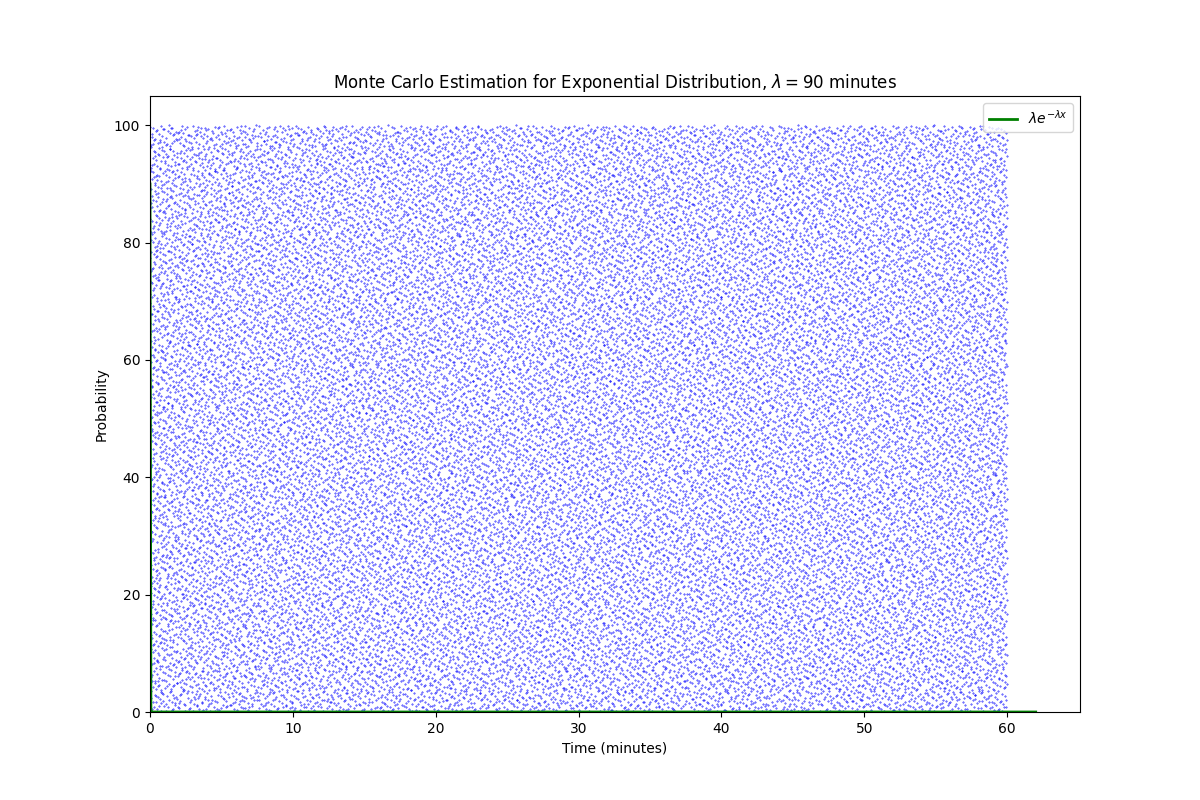

In [25]:
# Cell 2: Re-compute the integral using 90 minutes rather than 1.5 hours as the rate parameter.


def main() -> None:
    plt.close("all")
    plt.figure(" ", figsize=(12, 8))
    # Use 90 mins as the rate parameter
    plot_mc_exp_dist(90, "minutes", (0.0, 0.0), 60.0, 100.0, plt.axes())
    plt.show()


main()
